### A discrete reactive collision scheme for the lattice Boltzmann method
Implemented based on the paper of Ivan Pribec et al. (2021) published in the Journal of Molecular Liquids.

The code solves the reaction-diffusion-advection (RDA) equation using the lattice Boltzmann method (LBM) with D2Q5 lattice. It simulates two reactive components $A$ and $B$ which undergo a reaction creating another (inert) component $C$. It is a irreversible reaction.

$A + B \longrightarrow C$

Diffusion coefficient $D_s = \frac{1}{3} (\tau_s - \frac{1}{2})$

Source term from the reaction component
$R_s^\prime(\mathbf{x}, i, t) = \sum_{j,k} K_{AB,s}(i,j,k) \sigma_{AB}(g_{j,k}) g_{j,k} f_A(\mathbf{x},j,t) f_B(\mathbf{x}, k, t)$

$i = 1\ldots Q$, $j \in 1\ldots Q$, $k \in 1\ldots Q$.

Matrices $K_{AB,A} = \{ \}$ and $K_{AB,B} = \{ \}$, while matrix $K_{AB,C}$ is the most complicated.

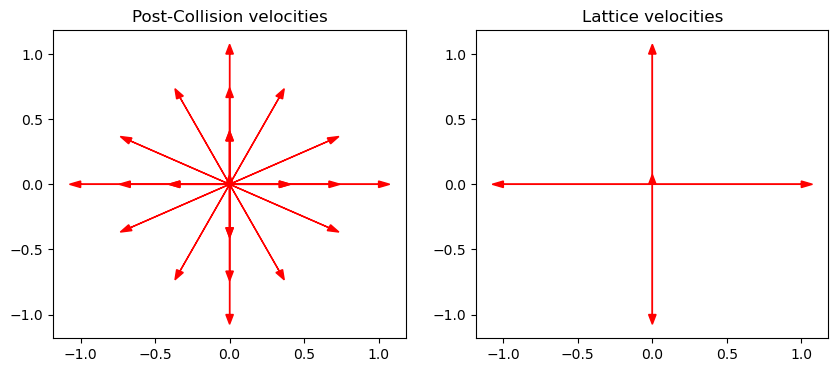

In [107]:
D, Q = 2, 5
# K(i,j,k)
K_ABA = [(i ≠ j) ? 0.0 : -1.0 for i=1:Q, j=1:Q, k=1:Q]
K_ABB = [(i ≠ k) ? 0.0 : -1.0 for i=1:Q, j=1:Q, k=1:Q]
# e(i)
e = [ # lattice velocities
 0.  0.
 1.  0.
 0.  1.
-1.  0.
 0. -1.
]
ω = [ # weights
 1/3
 1/6
 1/6
 1/6
 1/6
]
# g(j,k)
g =[ # relative velocites
    0. 1. 1. 1. 1.
    1. 0. √2 2. √2
    1. √2 0. √2 2.
    1. 2. √2 0. √2
    1. √2 2. √2 0.]

mA, mB = 1.0, 2.0
mC = mA + mB
e′ = [mA/mC * e[j,d] .+ mB/mC * e[k,d] for j=1:Q, k=1:Q, d=1:2]
using PyPlot
figure(figsize=(10,4))
subplot(1,2,1)
title("Post-Collision velocities")
for j=1:Q,k=1:Q
    arrow(0., 0., e′[j,k,1], e′[j,k,2], head_width=0.05, color="r")
end
subplot(1,2,2)
title("Lattice velocities")
for i=1:Q
    arrow(0., 0., e[i,1], e[i,2], head_width=0.05, color="r")
end

In [104]:
K_ABC = zeros(Q, Q, Q)
for j=1:Q, k=1:Q
    i0, i′, i″ = 1, j, k
    if j == k
        continue
    elseif j == 1
        i′ = (k == Q ? k - 1 : k + 1)
    elseif k == 1
        i″ = (j == Q ? j - 1 : j + 1)
    elseif (j + k) % 2 == 0
        i″ = (j + k) ÷ 2
    elseif (j + k) % 2 == 1
        nothing
    end
    
    A = [1.00000 1.00000 1.00000
         e[i0,1] e[i′,1] e[i″,1]
         e[i0,2] e[i′,2] e[i″,2]]
    b = [1.000; e′[j,k,1]; e′[j,k,2]]
    
    K_ABC[[i0, i′, i″], j, k] .= A \ b
end
sum(K_ABC, dims=1)

1×5×5 Array{Float64, 3}:
[:, :, 1] =
 0.0  1.0  1.0  1.0  1.0

[:, :, 2] =
 1.0  0.0  1.0  1.0  1.0

[:, :, 3] =
 1.0  1.0  0.0  1.0  1.0

[:, :, 4] =
 1.0  1.0  1.0  0.0  1.0

[:, :, 5] =
 1.0  1.0  1.0  1.0  0.0